In [11]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install dependencies
!pip install tensorflow keras

# Step 3: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision

# Step 4: Set mixed precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Step 5: Set paths for data
train_dir = '/content/drive/MyDrive/chest_xray/train'
test_dir = '/content/drive/MyDrive/chest_xray/test'
val_dir = '/content/drive/MyDrive/chest_xray/val'

# Step 6: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=30,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Randomly shear images
    zoom_range=0.2,           # Randomly zoom
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill missing pixels
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Step 7: Load data (with smaller image size and larger batch size)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Use smaller image size to speed up
    batch_size=64,           # Increase batch size
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

# Step 8: Load EfficientNetB0 Model (Faster Model)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Step 9: Build Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Step 10: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train Model with EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=5,  # Start with 5 epochs for faster results
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Step 12: Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Step 13: Save Model (optional)
model.save('/content/drive/MyDrive/chest_xray/pneumonia_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5222 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 1505s 18s/step - accuracy: 0.7492 - loss: 0.5766 - val_accuracy: 0.5000 - val_loss: 0.7893
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 962ms/step - accuracy: 0.7321 - loss: 0.5829 - val_accuracy: 0.5000 - val_loss: 0.7931
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 959ms/step - accuracy: 0.7414 - loss: 0.5744 - val_accuracy: 0.5000 - val_loss: 0.8424
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 957ms/step - accuracy: 0.7444 - loss: 0.5700 - val_accuracy: 0.5000 - val_loss: 0.8899
10/10 ━━━━━━━━━━━━━━━━━━━━ 220s 22s/step - accuracy: 0.6327 - loss: 0.6711


Test accuracy: 62.50%


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Setup paths (adjust your paths accordingly)
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/test'

# Image preprocessing with ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# MobileNetV2 model for quick training
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Building the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add Early Stopping to prevent overfitting and save time
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Limit to 5 epochs for fast results
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Found 5222 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 441ms/step - accuracy: 0.8080 - loss: 0.4046 - val_accuracy: 0.8125 - val_loss: 0.3971
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 62s 376ms/step - accuracy: 0.9542 - loss: 0.1486 - val_accuracy: 0.6250 - val_loss: 0.6292
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 62s 376ms/step - accuracy: 0.9628 - loss: 0.1146 - val_accuracy: 0.8750 - val_loss: 0.3637
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 62s 377ms/step - accuracy: 0.9683 - loss: 0.0987 - val_accuracy: 0.8750 - val_loss: 0.3188
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 61s 371ms/step - accuracy: 0.9689 - loss: 0.0901 - val_accuracy: 0.8750 - val_loss: 0.2602
Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.8388 - loss: 0.3757
Test accuracy: 86.70%


In [13]:
from google.colab import files
uploaded = files.upload()


Saving IM-0117-0001.jpeg to IM-0117-0001.jpeg


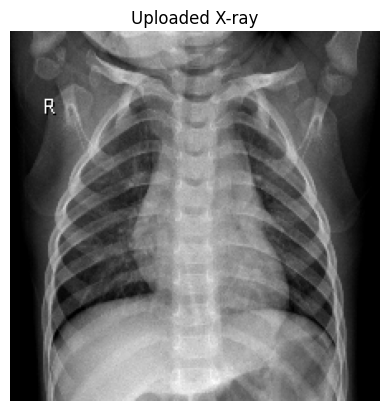

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
🟢 Prediction: Normal


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with your uploaded file name
img_path = list(uploaded.keys())[0]  # Get the uploaded image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded X-ray")
plt.show()

# Make prediction
prediction = model.predict(img_array)

# Interpret prediction
if prediction[0][0] < 0.5:
    print("🟢 Prediction: Normal")
else:
    print("🔴 Prediction: Pneumonia")
